Bộ dữ liệu này có vẻ là phiên bản của bộ dữ liệu Titanic với các cột sau:
- PassengerId: Mã định danh duy nhất cho mỗi hành khách.
- Survived: Chỉ ra hành khách có sống sót (1) hay không (0).
- Pclass: Hạng hành khách (hạng 1, 2 hoặc 3).
- Name: Tên hành khách.
- Sex: Giới tính (0 đối với nữ, 1 đối với nam).
- Age: Tuổi của hành khách.
- SibSp: Số anh chị em ruột hoặc vợ/chồng trên tàu Titanic.
- Parch: Số cha mẹ hoặc con cái trên tàu Titanic.
- Vé: Số vé.
- Fare: Giá vé do hành khách trả.
- Embarked: Cảng lên tàu (C = Cherbourg, Q = Queenstown, S = Southampton).

Bộ dữ liệu Titanic giúp chúng ta phân tích các yếu tố như giới tính, độ tuổi, và hạng vé có ảnh hưởng đến tỷ lệ sống sót như thế nào.

In [2]:
from google.colab import drive

# Kết nối Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/MyDrive/data_analysis/Titanic_ok.csv'

df = pd.read_csv(file_path)
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    int64  
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(6), object(3)
memory usage: 76.5+ KB


In [7]:
df.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,0.649044,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,0.477538,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.shape

(889, 11)

In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df.duplicated().sum()

0

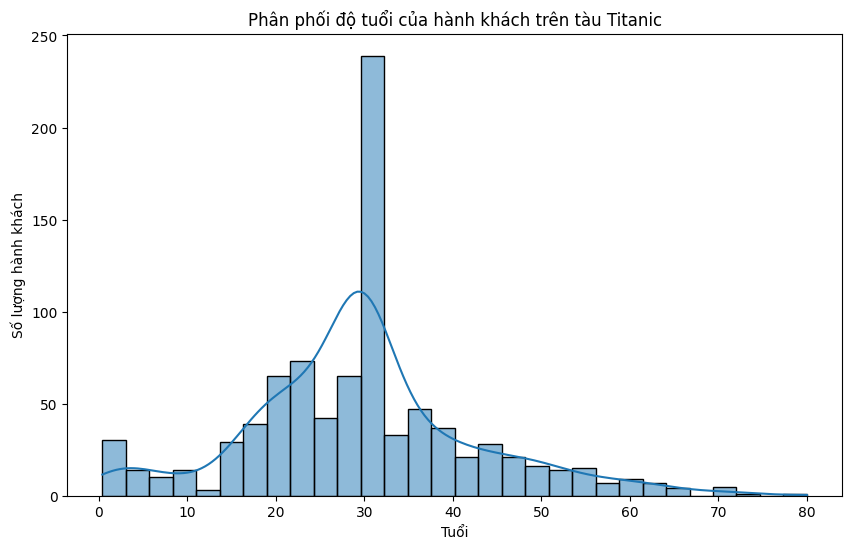

In [13]:
# Biểu đồ phân phối tuổi của hành khách
plt.figure(figsize=(10,6))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Phân phối độ tuổi của hành khách trên tàu Titanic')
plt.xlabel('Tuổi')
plt.ylabel('Số lượng hành khách')
plt.show()

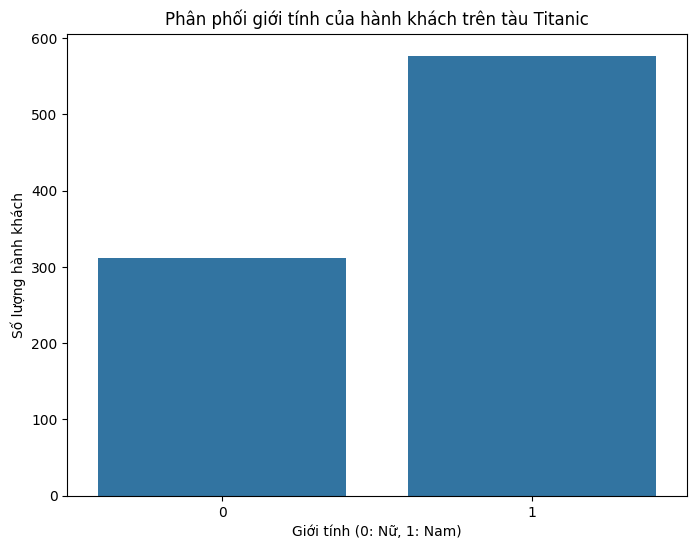

,count
Sex,
1,577
0,312


In [15]:
# Thống kê phân phối giới tính trong dataset Titanic
gender_distribution = df['Sex'].value_counts()

# Visualize the gender distribution
plt.figure(figsize=(8,6))
sns.barplot(x=gender_distribution.index, y=gender_distribution.values)
plt.title('Phân phối giới tính của hành khách trên tàu Titanic')
plt.ylabel('Số lượng hành khách')
plt.xlabel('Giới tính (0: Nữ, 1: Nam)')
plt.show()

gender_distribution

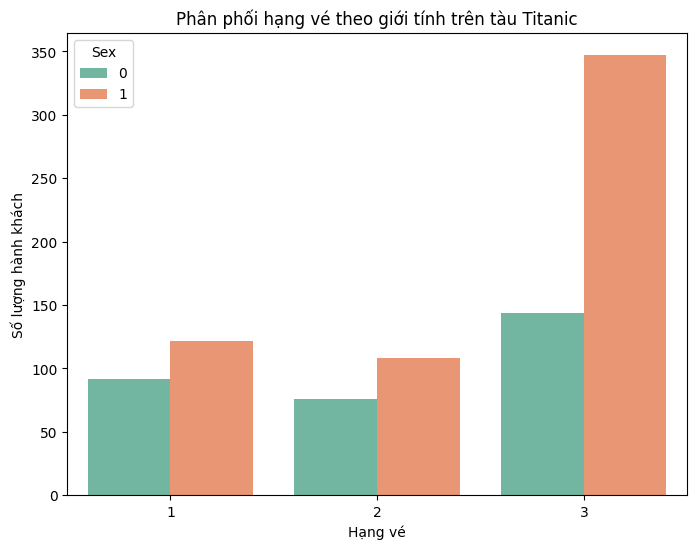

In [16]:
# Tạo biểu đồ cột chồng với biến 'Pclass' và 'Sex'
plt.figure(figsize=(8,6))
sns.countplot(x='Pclass', hue='Sex', data=df, palette='Set2')

# Đặt tiêu đề và nhãn cho biểu đồ
plt.title('Phân phối hạng vé theo giới tính trên tàu Titanic')
plt.xlabel('Hạng vé')
plt.ylabel('Số lượng hành khách')

# Hiển thị biểu đồ
plt.show()

In [18]:
# Tính tỷ lệ sống sót trung bình
average_survival_rate = df['Survived'].mean() * 100

# Tính tuổi trung bình của hành khách
average_age = df['Age'].mean()

# Tính hạng vé trung bình (Pclass)
average_pclass = df['Pclass'].mean()

# Tính giá vé trung bình (Fare)
average_fare = df['Fare'].mean()

# Tính giá vé tối đa để thấy sự biến động
max_fare = df['Fare'].max()

# In kết quả
print(f"Tỷ lệ sống sót trung bình: {average_survival_rate:.2f}%")
print(f"Tuổi trung bình của hành khách: {average_age:.2f} tuổi")
print(f"Hạng vé trung bình của hành khách: {average_pclass:.0f}")
print(f"Giá vé trung bình: {average_fare:.2f} USD")
print(f"Giá vé tối đa: {max_fare:.2f} USD")


Tỷ lệ sống sót trung bình: 38.25%
Tuổi trung bình của hành khách: 29.65 tuổi
Hạng vé trung bình của hành khách: 2
Giá vé trung bình: 32.10 USD
Giá vé tối đa: 512.33 USD


<ipython-input-26-7a067bc8c5a4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None, palette='Set3')


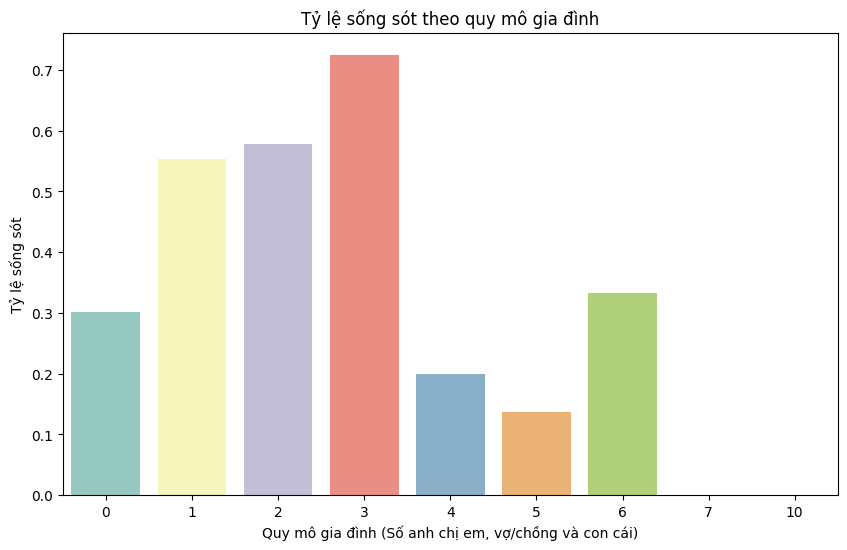

In [26]:
# Tỷ lệ sống sót theo kích thước gia đình (SibSp + Parch)
df['FamilySize'] = df['SibSp'] + df['Parch']

# Biểu đồ tỷ lệ sống sót theo quy mô gia đình (FamilySize)
plt.figure(figsize=(10,6))

# Sử dụng tham số 'palette' để thay đổi màu sắc, bạn có thể chọn bảng màu khác hoặc chỉ định màu cụ thể
sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None, palette='Set3')

plt.title('Tỷ lệ sống sót theo quy mô gia đình')
plt.xlabel('Quy mô gia đình (Số anh chị em, vợ/chồng và con cái)')
plt.ylabel('Tỷ lệ sống sót')

# Hiển thị biểu đồ
plt.show()


Hành khách có quy mô gia đình nhỏ (1-3 người) có tỷ lệ sống sót cao hơn.
Những người có quy mô gia đình lớn (từ 4 người trở lên) có tỷ lệ sống sót giảm đi rõ rệt.

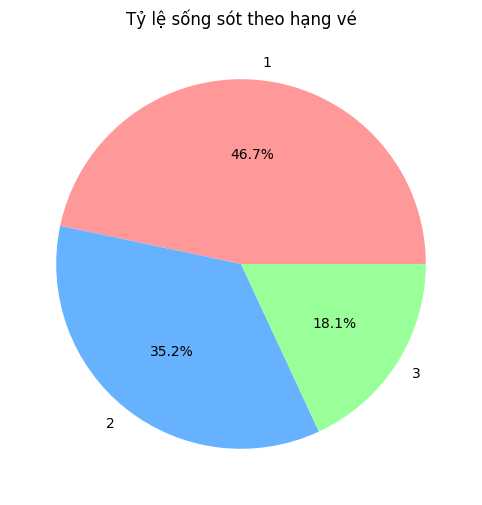

In [34]:
# Tính tỷ lệ sống sót theo hạng vé
survival_by_class = df.groupby('Pclass')['Survived'].mean()

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,6))
plt.pie(survival_by_class, labels=survival_by_class.index, autopct='%1.1f%%', colors=['#FF9999', '#66B2FF', '#99FF99'])
plt.title('Tỷ lệ sống sót theo hạng vé')

# Hiển thị biểu đồ
plt.show()

Hành khách ở hạng vé 1 có tỷ lệ sống sót cao hơn so với hạng vé 2 và 3, điều này cho thấy sự khác biệt về địa vị xã hội có ảnh hưởng đến cơ hội sống sót.

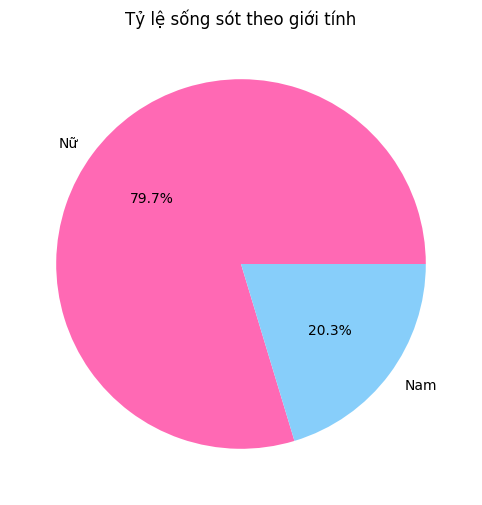

In [37]:
# Tính tỷ lệ sống sót theo giới tính
survival_by_gender = df.groupby('Sex')['Survived'].mean()

# Đổi nhãn giới tính 0 -> Nữ, 1 -> Nam
labels = ['Nữ', 'Nam']

# Vẽ biểu đồ tròn
plt.figure(figsize=(8,6))
plt.pie(survival_by_gender, labels=labels, autopct='%1.1f%%', colors=['#FF69B4', '#87CEFA'])
plt.title('Tỷ lệ sống sót theo giới tính')

# Hiển thị biểu đồ
plt.show()


Phụ nữ (được biểu diễn bằng 0 trong cột 'Sex') có tỷ lệ sống sót cao hơn đáng kể so với nam giới, phản ánh quy tắc sơ tán "phụ nữ và trẻ em trước".

<ipython-input-56-d730d8b56266>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")


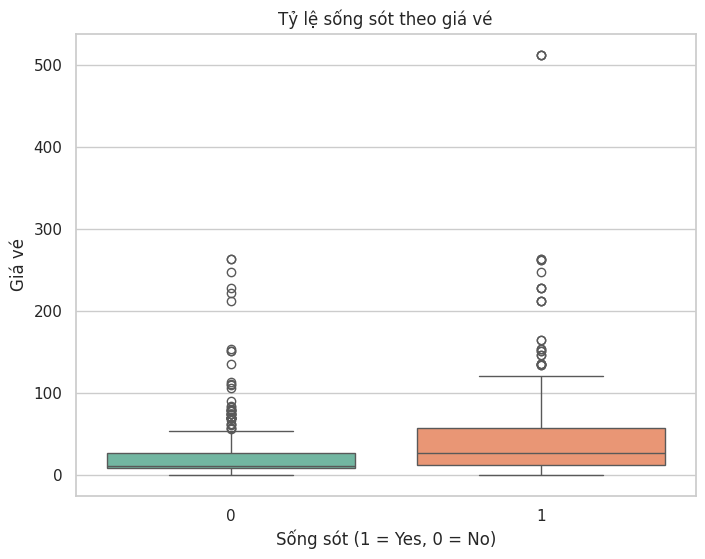

In [56]:
# Box plot for fare by survival
plt.figure(figsize=(8, 6))
sns.boxplot(x="Survived", y="Fare", data=df, palette="Set2")
plt.title("Tỷ lệ sống sót theo giá vé")
plt.xlabel("Sống sót (1 = Yes, 0 = No)")
plt.ylabel("Giá vé")
plt.show()

<ipython-input-55-40f886ecd5f7>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()
<ipython-input-55-40f886ecd5f7>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="AgeGroup", y="Survived", data=age_group_survival, palette="Set2")


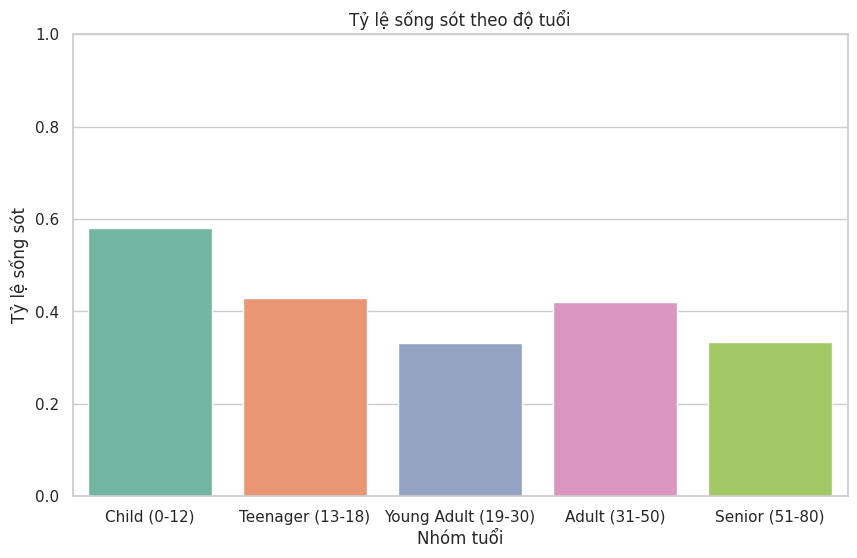

In [55]:
# Create an age group column for categorization
bins = [0, 12, 18, 30, 50, 80]
labels = ['Child (0-12)', 'Teenager (13-18)', 'Young Adult (19-30)', 'Adult (31-50)', 'Senior (51-80)']
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Calculate survival rate by age group
age_group_survival = df.groupby('AgeGroup')['Survived'].mean().reset_index()

# Plot survival rate by age group
plt.figure(figsize=(10, 6))
sns.barplot(x="AgeGroup", y="Survived", data=age_group_survival, palette="Set2")
plt.title("Tỷ lệ sống sót theo độ tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Tỷ lệ sống sót")
plt.ylim(0, 1)  # Limit y-axis to show percentages better
plt.show()


- Trẻ em (0-12 tuổi): Có tỷ lệ sống sót khá cao.
- Thanh thiếu niên (13-18 tuổi) và Người trưởng thành trẻ (19-30 tuổi): Tỷ lệ sống sót thấp hơn so với trẻ em.
- Người lớn (31-50 tuổi): Tỷ lệ sống sót tương đối trung bình.
- Người cao tuổi (51-80 tuổi): Tỷ lệ sống sót thấp nhất trong tất cả các nhóm.

<ipython-input-54-b1cffb6db45d>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_sex_survival = df.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()


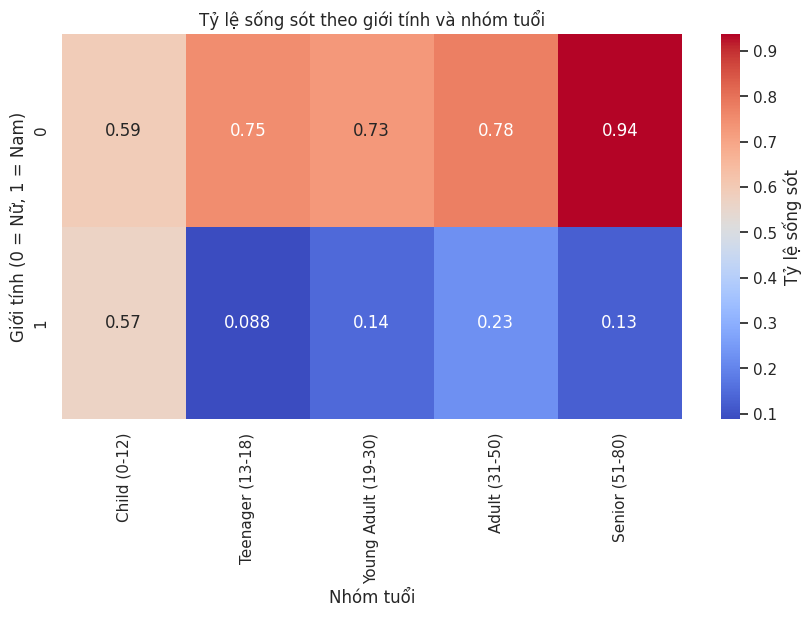

In [54]:
# Tính tỷ lệ sống sót theo giới tính và nhóm tuổi
age_sex_survival = df.groupby(['Sex', 'AgeGroup'])['Survived'].mean().unstack()

# Trực quan hóa bằng biểu đồ heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(age_sex_survival, annot=True, cmap="coolwarm", cbar_kws={'label': 'Tỷ lệ sống sót'})
plt.title("Tỷ lệ sống sót theo giới tính và nhóm tuổi")
plt.xlabel("Nhóm tuổi")
plt.ylabel("Giới tính (0 = Nữ, 1 = Nam)")
plt.show()

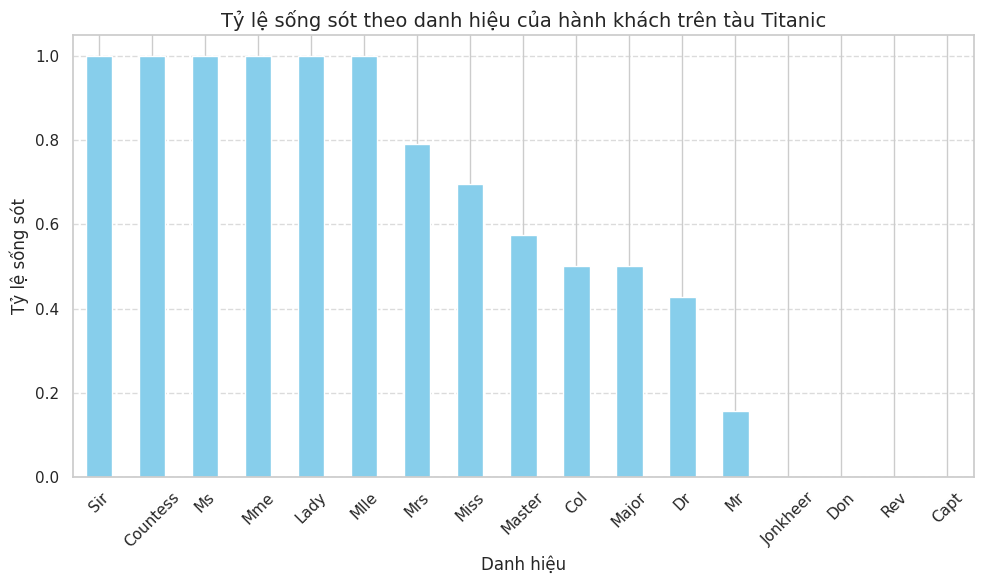

In [58]:
# Tách danh hiệu từ cột Name
df['Title'] = df['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Tính tỷ lệ sống sót dựa trên danh hiệu
title_survival_rate = df.groupby('Title')['Survived'].mean().sort_values(ascending=False)

# Vẽ biểu đồ cột
plt.figure(figsize=(10, 6))
title_survival_rate.plot(kind='bar', color='skyblue')
plt.title('Tỷ lệ sống sót theo danh hiệu của hành khách trên tàu Titanic', fontsize=14)
plt.xlabel('Danh hiệu', fontsize=12)
plt.ylabel('Tỷ lệ sống sót', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()

Kết quả phân tích tỷ lệ sống sót dựa trên danh hiệu trong tên của hành khách như sau:
- Những người có danh hiệu Sir, Countess, Ms, Mme, Lady, và Mlle đều có tỷ lệ sống sót 100%.
- Mrs (Phụ nữ đã kết hôn) có tỷ lệ sống sót cao, khoảng 79%.
- Miss (Phụ nữ chưa kết hôn) có tỷ lệ sống sót khoảng 69.6%.
- Master (thường chỉ trẻ em nam) có tỷ lệ sống sót khoảng 57.5%.
- Mr (Nam giới trưởng thành) có tỷ lệ sống sót thấp nhất, chỉ khoảng 15.7%.
- Một số danh hiệu như Jonkheer, Don, Rev, Capt có tỷ lệ sống sót 0%.

Như vậy, danh hiệu trong tên có mối liên hệ khá rõ ràng với tỷ lệ sống sót, đặc biệt là những danh hiệu của tầng lớp cao hơn hoặc phụ nữ có xu hướng sống sót nhiều hơn.